implement a simple DNN for solving the polynomial y=5x^3 - 7x + 1 witth the following conditions .(i) use three hidden layers of sizes 32,64,128 and display the generated DNN with the parameter numbers .(ii) Generate training samples within the range -15 to +15 . Use appropriate method for normalizing training data in the range of -1  to  +1   (iii) use 5% of the samples as test data and 5% of samples as validation data and the rest of the data for training the DNN with appropriiate number of epochs.     (iv)   Display the training accuracy vs validation accuracy and training error vs validation error curves.. (v) After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data .

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,877 (124.52 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,252 (83.02 KB)

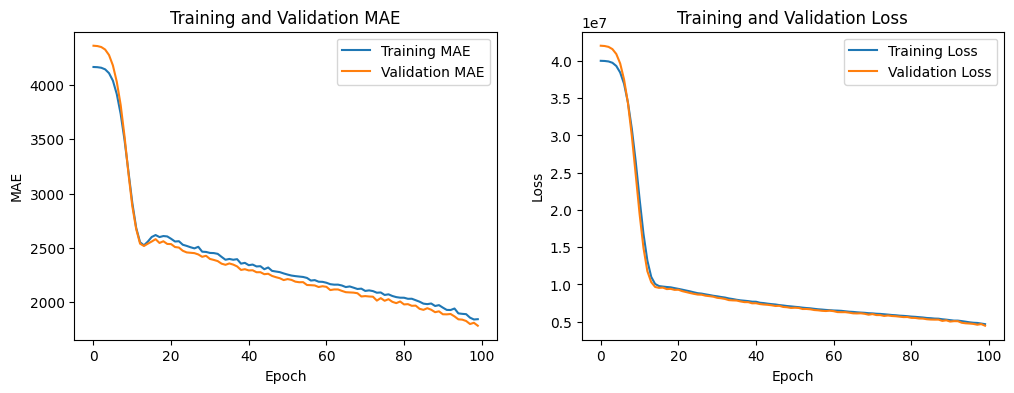

Test Loss: 4526857.0000
Test MAE: 1829.5746
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


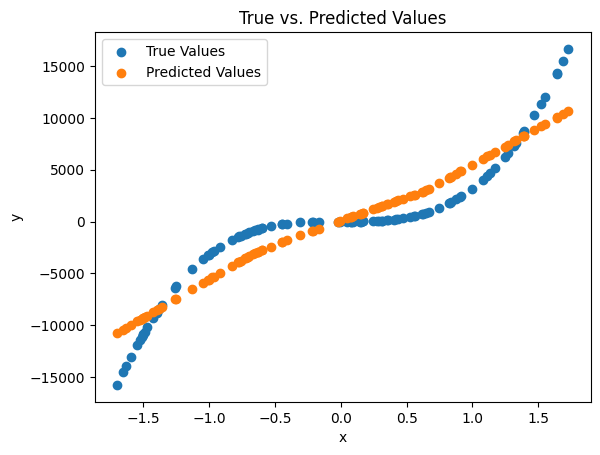

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Generate Training Data
x_train = np.linspace(-15, 15, 1000)  # Generate x values in the range -15 to +15
y_train = 5 * x_train**3 - 7 * x_train + 1  # Calculate corresponding y values

# 2. Normalize Training Data
x_train_normalized = (x_train - np.mean(x_train)) / np.std(x_train)  # Normalize to -1 to +1 range

# 3. Split Data into Train, Validation, and Test Sets
x_train, x_test, y_train, y_test = train_test_split(x_train_normalized, y_train, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# 4. Create and Compile the DNN Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),  # Hidden layer 1 with 32 neurons
    Dense(64, activation='relu'),  # Hidden layer 2 with 64 neurons
    Dense(128, activation='relu'),  # Hidden layer 3 with 128 neurons
    Dense(1)  # Output layer with 1 neuron
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Compile with Adam optimizer

# 5. Train the Model
history = model.fit(x_train.reshape(-1, 1), y_train, epochs=100, batch_size=32,
                    validation_data=(x_val.reshape(-1, 1), y_val), verbose=0)  # Train for 100 epochs

# 6. Display Model Summary
model.summary()  # Show model architecture and parameter numbers

# 7. Plot Training and Validation Metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 8. Evaluate on Test Data and Plot Predictions
loss, mae = model.evaluate(x_test.reshape(-1, 1), y_test, verbose=0)  # Evaluate on test data
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

y_pred = model.predict(x_test.reshape(-1, 1))  # Predict on test data

plt.scatter(x_test, y_test, label='True Values')
plt.scatter(x_test, y_pred, label='Predicted Values')
plt.title('True vs. Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()